# Funciones de activación.
Recuerden el teorema de universalidad. El gran valor de una ANN es que puede simular casi cualquier funci'on que usted se imagine en espacioes reales y complejos.

Las funciones de activacion hacen el papel de **bases** en un espacio vectorial, aunque inicialmente no hacian este papel. Eran muy simples, simplemente con una funci'on heaviside, step para decidir de acuerdo a un umbral si algo "pasa" o " no pasa". Empezamos con funciones muy simples que no son bases.

## Identidad.
La identidad sirve para ver una red neuronal como un regresion lineal.
$$I(x)=X$.

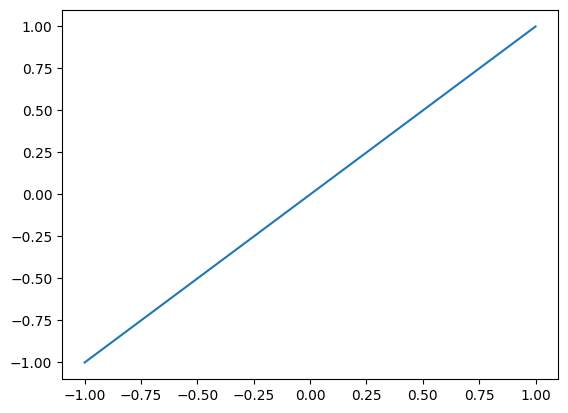

In [1]:
# GRAPH the identity
import numpy as np
import matplotlib.pyplot as plt

def I(x):
    return x

# graph it
D=np.linspace(-1,1,100)
plt.plot(D,I(D))
plt.show()

## Heaviside (step function, funcion de paso)
\begin{eqnarray}
H(t) =
\begin{cases}
1 \quad \text{si}   \quad t>0 \\
0 \quad \text{si}  \quad t \le 0
\end{cases}
\end{eqnarray}


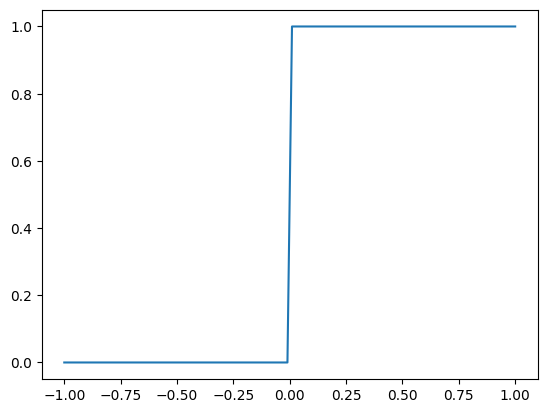

In [4]:
# plot the step function

def H(t):
    return np.where(t > 0, 1, 0)

# graph it
D=np.linspace(-1,1,100)
plt.plot(D,H(D))
plt.show()

## Logistic Sigmoid.
Ya la estudiamos

$$S(t) = \frac{1}{1 + \exp(-t)} $$

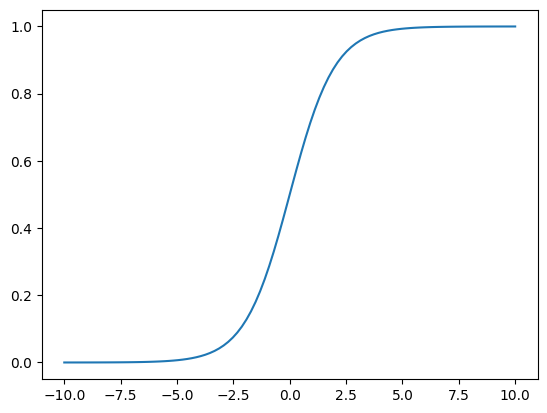

In [6]:
# draw the logistic sigmoid

def S(t):
    return 1/(1+np.exp(-t))

# graph it
D=np.linspace(-10,10,100)
plt.plot(D,S(D))
plt.show()
#

## ReLU (Rectified Linear Unit)

\begin{eqnarray}
\text{ReLU}(t)=
\begin{cases}
t \quad , \quad \text{si   } t > 0 \\
0 \quad , \quad \text{si   } t \le 0
\end{cases}
\end{eqnarray}

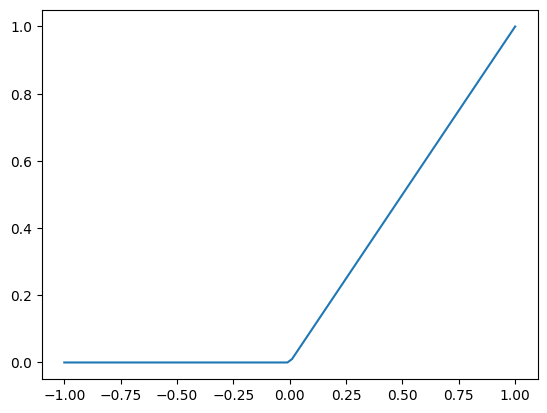

In [13]:
# plot the ReLU function

def ReLU(t):
    return np.where(t > 0, t, 0)

# graph it
D=np.linspace(-1,1,100)
plt.plot(D,ReLU(D))
plt.show()
#

Problemas de las dos anteriores.
* La Sigmoid tiene derivada cercana a cero para argumentros grandes
* La ReLU tiene derivada 0 para argumentos negativos.

LLega la
## Leaky ReLU

\begin{eqnarray}
\text{Leaky ReLU}(t)=
\begin{cases}
t \quad , \quad \text{si   } t > 0 \\
at \quad , \quad \text{si   } t \le 0
\end{cases}
\end{eqnarray}
donde $a>0$ en general $a \ll 1$.
Por ejemplo tipico $a=0.01$

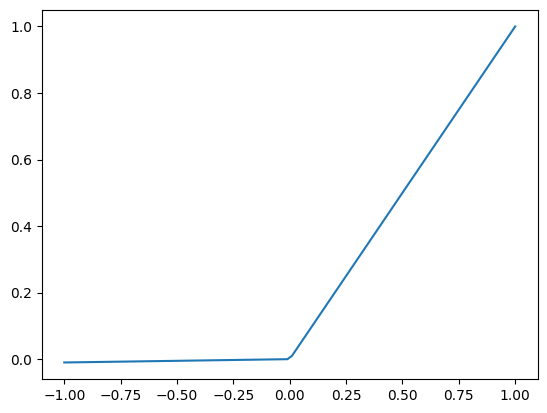

In [16]:
# plot the leaky ReLU
def LReLU(t):
    return np.where(t > 0, t, 0.01*t)

# plot it
D=np.linspace(-1,1,100)
plt.plot(D,LReLU(D))
plt.show()
#

suavizamos la esquina
## ELU (Exponential Linear Unit)

\begin{eqnarray}
\text{Leaky ELU}(t)=
\begin{cases}
t \quad , \quad \text{si   } t > 0 \\
\alpha ( \mathrm{e}^t - 1) \quad , \quad \text{si   } t \le 0
\end{cases}
\end{eqnarray}
donde $\alpha>0$ en general $a \ll 1$.
Por ejemplo tipico $a=0.01$

Si $\alpha=1$ la funcion y su primera derivada son continuas.


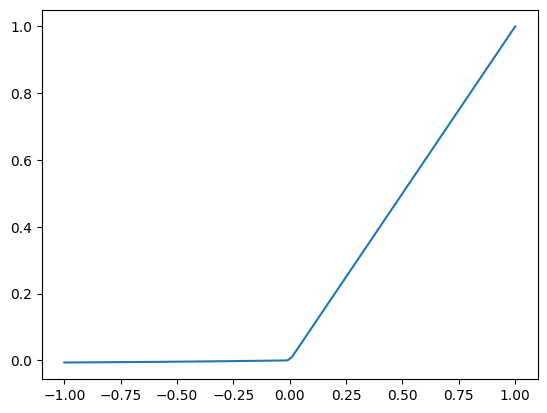

In [19]:
# plot the ELU function
def ELU(t):
    return np.where(t > 0, t, 0.01*(np.exp(t)-1))

# plot it
D=np.linspace(-1,1,100)
plt.plot(D,ELU(D))
plt.show()
#

## Softmax
La exponencial de $\theta x$ en cada clase, sobre la suma de todas las exponenciales. Ya la vimos.

# Propagaci'on hacia adelante.


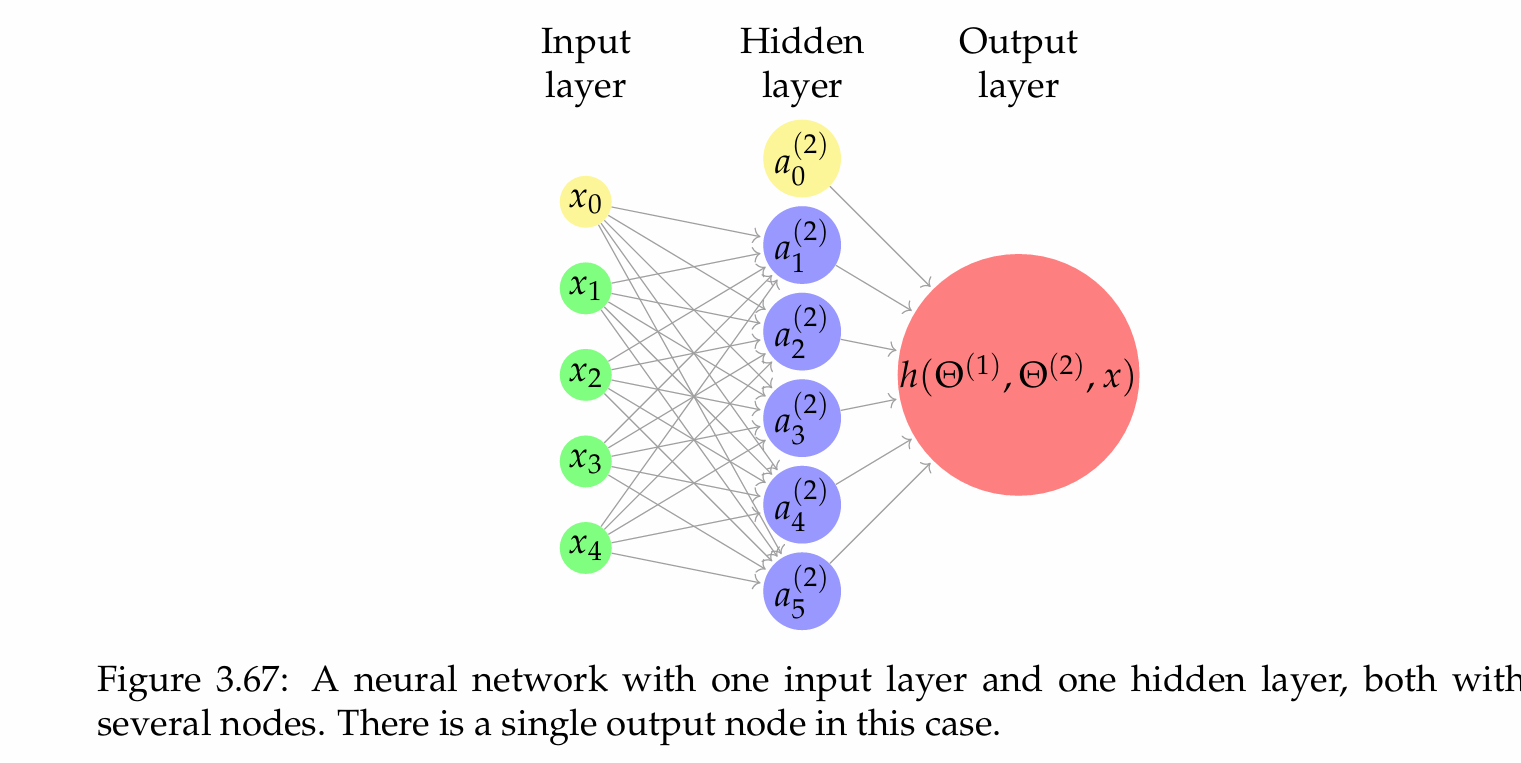

De forma sistematica  comenzamos con modelos peque~nos y los ampliamos.

## Una capa de entrada, una oculta una de salida.
Pensemos en la negatci'on logica

| $x$ | $$\sum \theta_j x_j = - x$$ | $\ge$ umbral | no $x$ |
|---|--------------------------|-------------|-------|
| 0 | 0 | 0 |  1 |
| 1 | -1 | 0 |  0 |

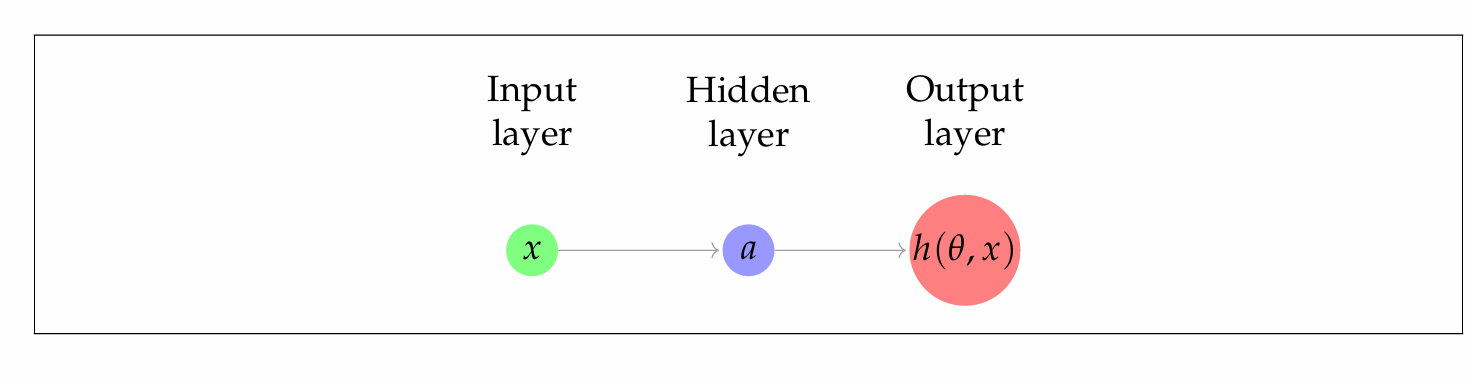

El proceso es como sigue

* Tomamos los datos entrada $x$. Entre $x$ y $a$ hay dos peso ($\theta_0, \theta_1$). El $x$ lo ampliamos, ponemos un 1 al comienzo

Pensemos

$$
z^{(2)} =  (1 \quad  x) \binom{\theta_0}{\theta_1}  = \theta_0^{(2)} + \theta_1^{(2)} x
$$
El superindice (2) es por que llegamos a la segunda capa.

* Viene la activaci'on. Vamos a asumir que la activacion en esta clase es $S$

$$a^{(2)} = S(z^{(2)}) = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}}$$

* Calculamos un nuevo $z^{(3)}$

$$
z^{(3)} =  (1 \quad a^{(2)} ) \binom{\theta_0}{\theta_1}  = \theta_0^{(3)} + \theta_1^{(3)} a^{(2)}
$$

Finalmente

* Activamos $z^{(2)}$

$$h(\theta, x) = S(z^{(3)})   = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$

Final.



## Varios nodos (neuronas) de entrada uno oculto y uno de salida.

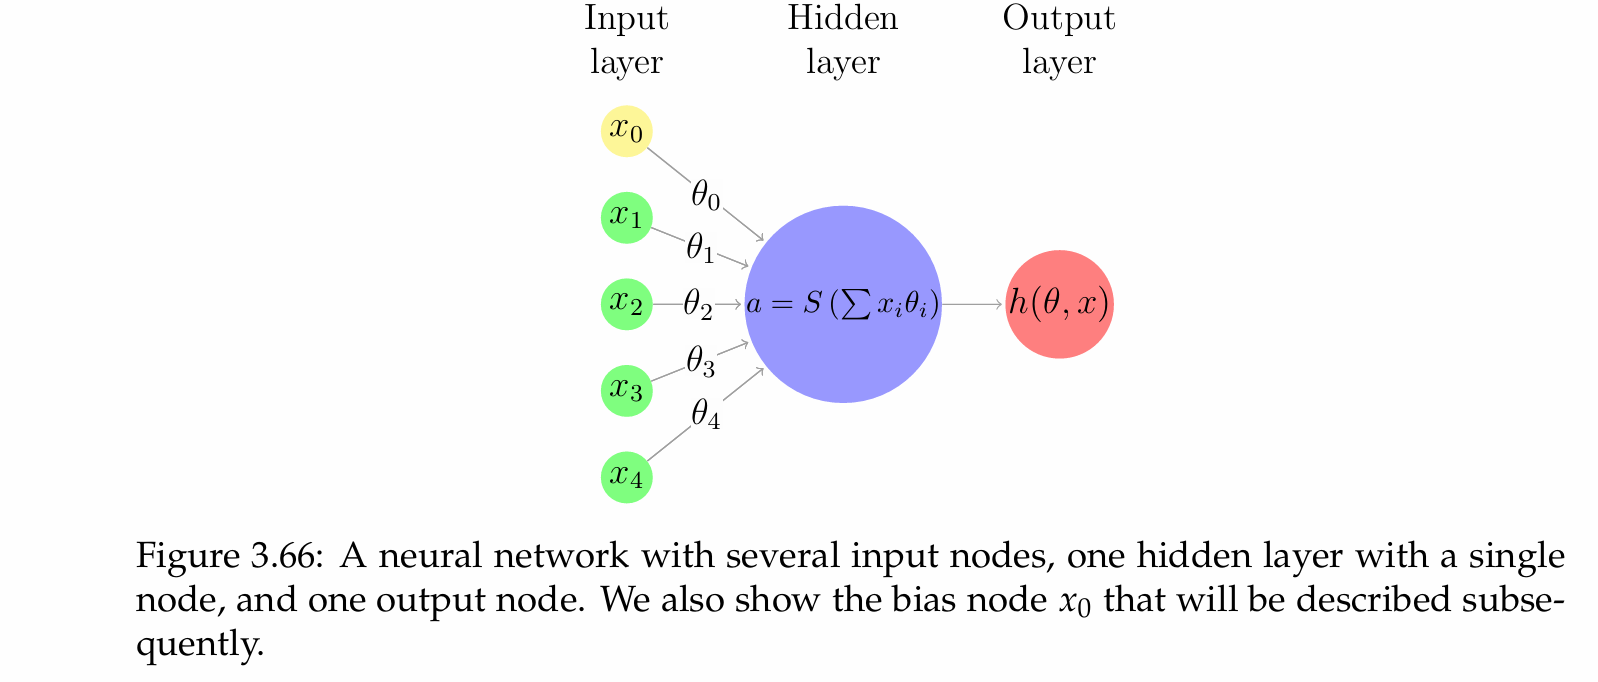

El proceso es similar

* Obtenemos $z^{(2)}$ como una combinaci'on lineal de los pesos con los datos (suma ponderada).

$$z^{(2)} (\theta, x) = x_0 \theta_0 + x_1 \theta_1 + \cdots x_4 \theta_4  $$

* Activamos $z^{(2)}$ con la Sigmoid $S(t)$

$$a^{(2)} = \frac{1}{1 + \mathrm{e}^{-z^{(2)}} } $$

* Generamos $z^{(3)}$
$$z^{(3)} = (1, a^{(2)}_1 ,\cdots, a^{(2)}_4)
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_4
\end{pmatrix}  $$

* Se activa $z_3$

$$h(\theta, x) = S(z^{(3)}) = \frac{1}{1+ \mathrm{e}^{-z^{(3)}}} $$

El Siguiente caso es varios de entrada, varios ocultos, uno de salida

## Varios de entrada, varios ocultos , uno de salida.



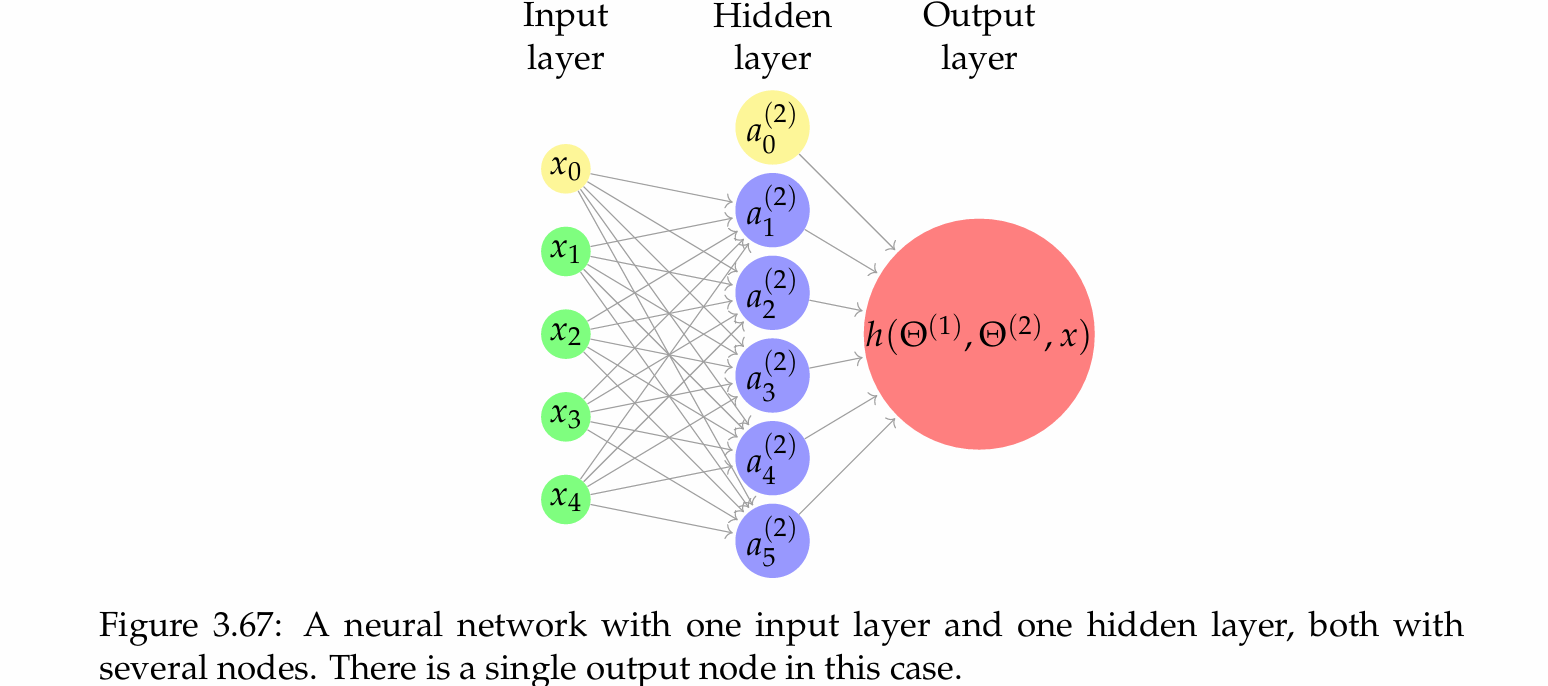

Ya los $z$ son varios en el medio

$$z_1^{(2)} = \sum_{j=0}^n x_j \theta_{j1}^{(1)} $$
$$z_2^{(2)} = \sum_{j=0}^n x_j \theta_{j2}^{(1)} $$
$$ \vdots $$
$$z_5^{(2)} = \sum_{j=0}^n x_j \theta_{j5}^{(1)} $$

En general

$$z_i^{(2)} = \sum_{j=0}^n x_j \theta_{ji}^{(1)} $$

Esto se puede escribir de forma matricial

vertical
$$z^{(2)} = x^T \Theta^{(1)} \tag{1} $$
Se usa
horizontal
$${z^{(2)}}^T =  (\Theta^{(1)})^T x $$

* Activacion de $z^{(2)}$

$$a_i^{(2)} =S(z_i^{(2)})=  \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}} $$
Componente-a-componente.
Vectorialmente

$$a^{(2)} =S(z^{(2)})=  \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} $$


 * Obtenemos $z^{(3)}$

De la Ecuacion (1) cambiando $x$ por $a$
 $$ z^{(3)} = a^T \Theta^{(2)}$$

* La salida es la activaci'on de esto

$$h(\theta, x) = S(z^{(3)}) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$

## Varias entradas, varios nodos ocultos, varias salidas.
En este caso

$$z_{ij}^{(2)} = \sum_{k=0}^n x_{ik} \theta_{kj}^{(1)} \quad , \quad i=1,2, \cdots, m \quad , \quad j=0, \cdots, p $$

Continuando
De forma matricial tenemos

$$Z^{(2)} = X \Theta^{(1)} $$
con dimensiones

$$Z^{(2)}_{m \times (p+1)} = X_{m \times n} \Theta^{(1)}_{n \times (p+1)}   $$  


Activamos esto

$$a_{ij}^{(2)} = \frac{1}{1 + \mathrm{e}^{-z_{ij}^{(2)}}} $$

De forma vectorizada

$$A^{(2)} = \frac{1}{1 + \mathrm{e}^{-Z^{(2)}}} $$


Finalmente
$$Z^{(3)} = A^{(2)} \Theta^{(2)}   $$  

y
$$h_j^{(i)}(\Theta^{(2)}, Z^{(3)}) = \frac{1}{1 + \mathrm{e}^{-\sum_{k=0}^p a_{ik}^{(2)} \theta_{kj}}} $$

10:44.


i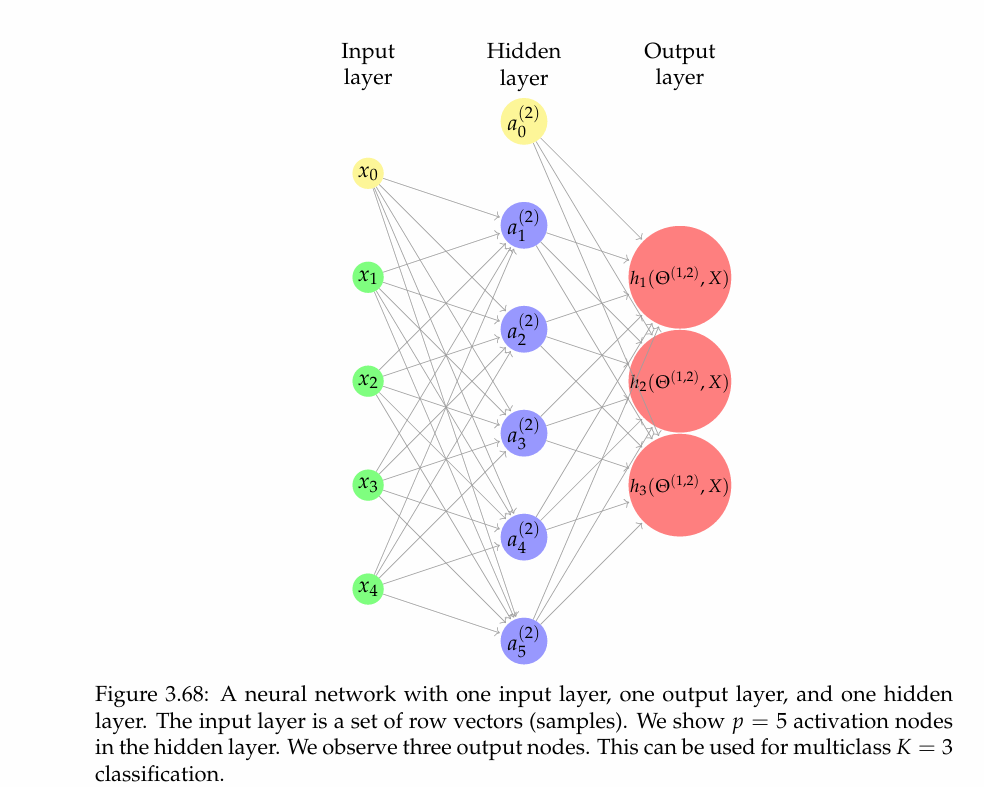

## Algoritmo de propagaci'on hacia adelante



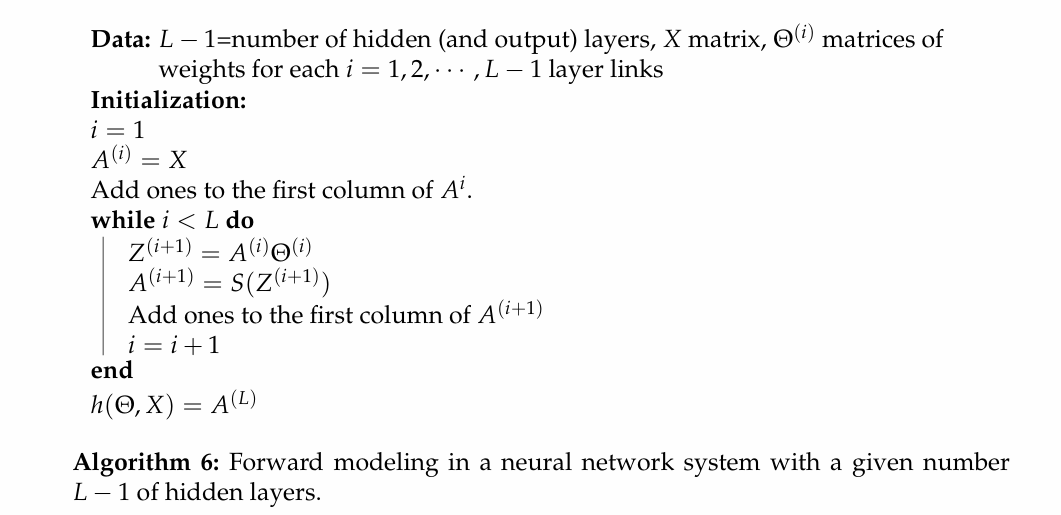

$$f( \cdots  S(\Theta^{(2)})S(X \Theta^{(1)}) $$

**Ejemplo XOR**:

|$x_1$ | $x_2$ | $x_1$ XOR $x_2$ |
|------|--------|----------------|
|1 | 1 | 0
|1 | 0 | 1
|0 | 1 | 1
|0 | 0 | 0

Habiamos discutido que el XOR no es un modelo que se pueda simular con McCulloch and Pits.  Por que necesita mas capas.

Veamos que con una capa oculta se puede simular este operador l'ogico.

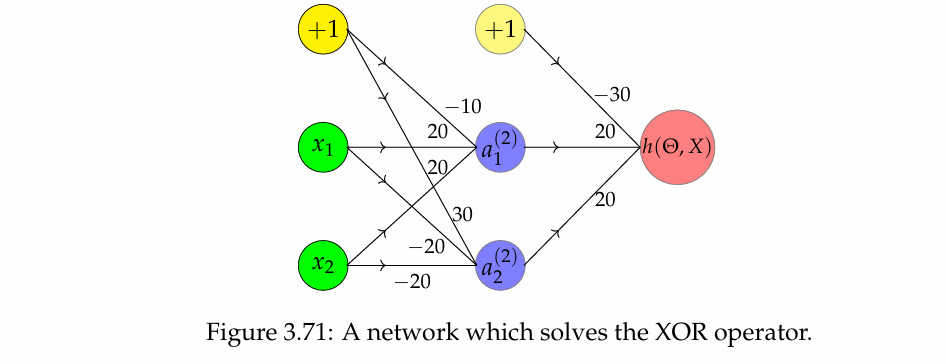

Al final decidimos si es Falso o Verdadero (0, 1) si
umbral=0.5

$$y = \begin{cases}
1 \quad \text{si  } h(\Theta,X) \ge \text{umbral} \\  
0 \quad \text{si  } h(\Theta,X) < \text{umbral}  
\end{cases}
$$

Recuerden el ciclo

$$Z^{(\ell + 1)} = A^{(\ell)} \Theta^{(\ell)}$$
$$A^{(\ell+1)} = S(Z^{(\ell+1)}) $$
$\ell=1,2$.

La notaci'on es la siguiente.

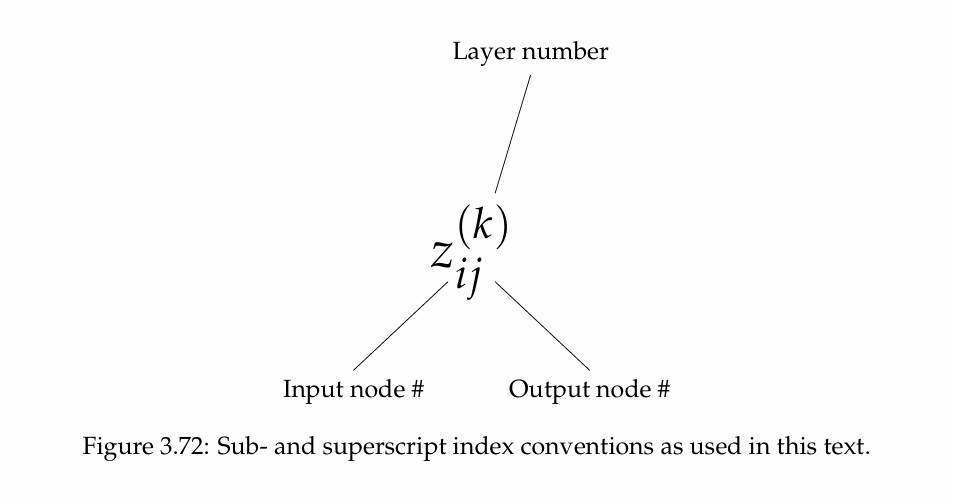

* Para $(x_1, x_2)=(1,1)$

Calculamos los $z$ y luego $a$

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 30 \\
a_{11}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-30}} \approx 1 \\
z_{12}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = -10 \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{10}} = 0.0000454 \approx 0.
\end{eqnarray}

Entonces

$$z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -9.9999092 \approx -10 $$
$$h(\theta, x^{(1)}) = S(z_{11}^{(3)})  \approx 0.0000454 \approx  0  $$

Como $0.0000454 <$ umbral (0.5) entonces el resultado es 0.

* Para $(x_1, x_2)=(1,0)$

Calculamos los $z$ y luego $a$

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 10 \\
a_{11}^{(2)} &=& S(z_{11}^{(3)}) = \frac{1}{1 + \mathrm{e}^{10}} \approx 0 \\
z_{12}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = 10 \\
a_{12}^{(2)} &=& S(z_{12}^{(3)}) = \frac{1}{1 + \mathrm{e}^{-10}} \approx 1
\end{eqnarray}

Entonces

$$z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = 10$$
$$h(\theta, x^{(1)}) = S(z_{11}^{(3)}) =1/(1 + \exp(-10)) \approx 0.999999 $$
como $0.99999 > 0.5$ el resultado es $y_2=1$.

* Para $(x_1, x_2)=(0,1)$

Calculamos los $z$ y luego $a$

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 10 \\
a_{11}^{(2)} &=& S(z_{11}^{(3)}) = \frac{1}{1 + \mathrm{e}^{10}} \approx 0 \\
z_{12}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = 10 \\
a_{12}^{(2)} &=& S(z_{12}^{(3)}) = \frac{1}{1 + \mathrm{e}^{-10}} \approx 1
\end{eqnarray}

Entonces

$$z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -10$$
$$h(\theta, x^{(1)}) = S(z_{11}^{(3)}) =1/(1 + \exp(10)) \approx 0.0 $$
como $0.0 < 0.5$ el resultado es $y_3=0$.



* Para $(x_1, x_2)=(0,0)$

Calculamos los $z$ y luego $a$

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = -10 \\
a_{11}^{(2)} &=& S(z_{11}^{(3)}) = \frac{1}{1 + \mathrm{e}^{-10}} \approx 1 \\
z_{12}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = 30 \\
a_{12}^{(2)} &=& S(z_{12}^{(3)}) = \frac{1}{1 + \mathrm{e}^{-30}} \approx 1
\end{eqnarray}

Entonces

$$z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = 10$$
$$h(\theta, x^{(1)}) = S(z_{11}^{(3)}) =1/(1 + \exp(-10)) \approx 0.999999 $$
como $0.99999 > 0.5$ el resultado es $y_3=1$.
Como $0.9999>0.5$ $y_4=1$.


Matrticialmente

$$X = \begin{pmatrix}  1 & 1 & 1 \\ 1 & 1 & 0 \\ 1 & 0 & 1 \\ 1 & 0 & 0 \end{pmatrix}  $$

$$\Theta^{(1)} = \begin{pmatrix} -10 & 30 \\ 20 & -20 \\ 20 & -20 \end{pmatrix}  $$

$$\Theta^{(2)} = \begin{pmatrix} -30 \\ 20 \\ 20  \end{pmatrix}  $$

$$Z^{(2)} = X \Theta^{(1)} = \begin{pmatrix} 30 & -10 \\ 10 & 10 \\ 10 & 10 \\ -10 & 30 \end{pmatrix} $$

$$A^{(2)} = S(Z^{(2)}) = \frac{1}{1 + \mathrm{e}^{-Z^{(2)}}} =
\begin{pmatrix}
1 & 0.0000454 \\
0.99995 & 0.99995 \\
0.99995 & 0.99995 \\
0.0000454 & 1
\end{pmatrix} $$

$$Z^{(3)} = A^{(2)} \Theta^{(2)} = \begin{pmatrix} -9.9991 \\ 9.9982 \\ 9.9982 \\ -9.9991\end{pmatrix}  $$

Finalmente

$$h(\Theta, X) = S(Z^{(3)}) = \begin{pmatrix}
0.0000454 \\
0.99995 \\
0.99995 \\
0.0000454
\end{pmatrix} $$
Comparando con el umbral $0.5$ se obtiene

$$y = \begin{pmatrix}
0 \\
1 \\
1 \\
0
\end{pmatrix} $$

Veamos el codigo en `Python`

In [20]:
import numpy as np

# sigmoid function
def s(x):
    return 1/(1 + np.exp(-x))

# datos de entrada (tabla)
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
n= len(X)

# columna de unos para pegar a los datos de entrada
ones = np.ones((n, 1))
X = np.concatenate((ones, X), axis=1)

# print :X
print('X = \n', X)

# Theta 1
Theta1 = np.array([[-10, 30], [20, -20], [20, -20]])
# print Theta1
print('Theta1 = \n', Theta1)

# Theta 2
Theta2 = np.array([-30, 20, 20])
# print Theta2
print('Theta2 = \n', Theta2)

# Z1
Z1 = np.dot(X, Theta1)
# print Z1
print('Z1 = \n', Z1)

# A1
A1 = s(Z1)
# print A1
print('A1 = \n', A1)

# add columns of ones
ones = np.ones((n, 1))
A1 = np.concatenate((ones, A1), axis=1)
# print it
print('A1 = \n', A1)

# Z2
Z2 = np.dot(A1, Theta2)
# print Z2
print('Z2 = \n', Z2)

# find H or A2
H = s(Z2)
# print
print('H = \n', H)

# make the logical table
B = (H > 0.5)
# print B
print('B = \n', B)


X = 
 [[1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 0.]]
Theta1 = 
 [[-10  30]
 [ 20 -20]
 [ 20 -20]]
Theta2 = 
 [-30  20  20]
Z1 = 
 [[ 30. -10.]
 [ 10.  10.]
 [ 10.  10.]
 [-10.  30.]]
A1 = 
 [[1.00000000e+00 4.53978687e-05]
 [9.99954602e-01 9.99954602e-01]
 [9.99954602e-01 9.99954602e-01]
 [4.53978687e-05 1.00000000e+00]]
A1 = 
 [[1.00000000e+00 1.00000000e+00 4.53978687e-05]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 4.53978687e-05 1.00000000e+00]]
Z2 = 
 [-9.99909204  9.99818409  9.99818409 -9.99909204]
H = 
 [4.54391049e-05 9.99954520e-01 9.99954520e-01 4.54391049e-05]
B = 
 [False  True  True False]


$$
\theta_{ij}^{(\ell), k+1} =  
\theta_{ij}^{(\ell), k}  -  \alpha \nabla J({\theta_{ij}^{(\ell), k}})
$$